After eating chocolate bars your whole life, you’ve decided to go on a quest to find the greatest chocolate bar in the world.

You’ve found a website that has over 1700 reviews of chocolate bars from all around the world. It’s displayed in the web browser on this page.

The data is displayed in a table, instead of in a csv or json. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.

Some questions we thought about when we found this dataset were:

**Where are the best cocao beans grown?**

**Which countries produce the highest-rated bars?**

**What’s the relationship between cocao solids percentage and rating?**

In [14]:

from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Let’s make a request to this site to get the raw HTML, which we can later turn into a BeautifulSoup object.**

In [15]:
webpage =  requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")
soup = BeautifulSoup(webpage.content,"html.parser")

**How many terrible chocolate bars are out there? And how many earned a perfect 5?**

In [16]:
b = soup.find_all(attrs={'class':'Rating'})
#print(b)

ratings = []
ctr = 0

for i in b:
  a = BeautifulSoup.get_text(i)
  if ctr == 0:
    ctr += 1
    continue
  ratings.append(float(a))


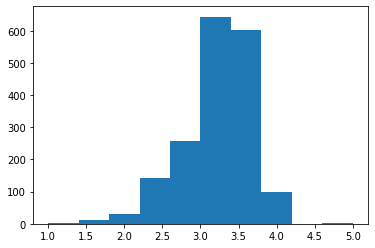

In [17]:
#print(ratings)
plt.hist(ratings)
plt.show()


In [18]:

comp = soup.select(".Company")

complist = []
for i in comp:
  a = BeautifulSoup.get_text(i)
  complist.append(a)
complist.pop(0)


'Company\xa0\n               (Maker-if known)\n            '

**We want to now find the 10 most highly rated chocolatiers.
One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a groupby to find the ones with the highest average rating.**

In [19]:
d = {"Ratings":ratings,"Company":complist}
your = pd.DataFrame.from_dict(d)
y = your.groupby("Company").Ratings.mean()
best = y.nlargest(10)
print(best)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64


**Checking the highest Cocoa Percentage in Chocolate Bars with respect to the ratings by creating the Best-Fit over the scatterplot with basic Numpy commands**

In [20]:
cocoa = soup.select(".CocoaPercent")
cocalist = []
for i in cocoa:
  a = BeautifulSoup.get_text(i)
  cocalist.append(a)
cocalist.pop(0)
coca = list(map(lambda x: x[:-1],cocalist))
coca = list(map(float,coca))

d["CocoaPercentage"] = coca
yours = pd.DataFrame.from_dict(d)
print(yours)

      Ratings   Company  CocoaPercentage
0        3.75  A. Morin             63.0
1        2.75  A. Morin             70.0
2        3.00  A. Morin             70.0
3        3.50  A. Morin             70.0
4        3.50  A. Morin             70.0
...       ...       ...              ...
1790     3.75    Zotter             70.0
1791     3.00    Zotter             65.0
1792     3.50    Zotter             65.0
1793     3.25    Zotter             62.0
1794     3.00    Zotter             65.0

[1795 rows x 3 columns]


In [21]:
d["CocoaPercentage"] = coca
yours = pd.DataFrame.from_dict(d)
print(yours)

      Ratings   Company  CocoaPercentage
0        3.75  A. Morin             63.0
1        2.75  A. Morin             70.0
2        3.00  A. Morin             70.0
3        3.50  A. Morin             70.0
4        3.50  A. Morin             70.0
...       ...       ...              ...
1790     3.75    Zotter             70.0
1791     3.00    Zotter             65.0
1792     3.50    Zotter             65.0
1793     3.25    Zotter             62.0
1794     3.00    Zotter             65.0

[1795 rows x 3 columns]


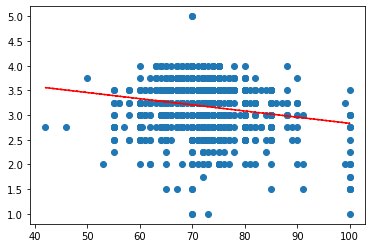

In [22]:
plt.clf()
plt.scatter( yours.CocoaPercentage,yours.Ratings)
z = np.polyfit(yours.CocoaPercentage, yours.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(yours.CocoaPercentage, line_function(yours.CocoaPercentage), "r--")
plt.show()

In [23]:
a = soup.select(".Origin")
b = soup.select(".CocoaPercent")
threebroadbean = []
for i in a:
  text = BeautifulSoup.get_text(i)
  threebroadbean.append(text)
  
threebroadbean.pop(0)

'Specific Bean Origin\n               or Bar Name\n            '

**Now let's hop on to find which regions cultivate the best beans of them all. We will operate by taking the already computed Origin and Percent values in a dictionary and then Grouping them by percent.**

In [24]:
newd = dict()
newd["Origin"] = threebroadbean
newd["Percent"] = coca
ogperc = pd.DataFrame.from_dict(newd)
ogperc = ogperc.groupby("Percent").sum()
res = ogperc[::-1]
print(res["Origin"])

Percent
100.0    VenezuelaOne HundredEl Oro, Hacienda de OroEcu...
99.0                              Noir InfiniPeru- Ecuador
91.0     PichinchaNocturneVenezuela; Barinos, Merida, T...
90.0     EcuadorTumbes, "Zarumilla"Los Rios, H. IaraBel...
89.0                            Dominican RepublicAmazonas
88.0     Vanua LevuMaracaiboEsmeraldasAfricaPNG, Voodoo...
87.0                                             Alto Beni
86.0                                                Belize
85.0     EcuadorGhanaMonte Alegre, 3 diff. plantationsC...
84.0     Sur del LagoDominican RepublicEcuador, Midnigh...
83.0     Belize south, low fermentationBelize southVanu...
82.0     Congo, Grand CruAkesson's E., Sambirano V.Boli...
81.0     Carenero SuperiorPalo Blanco w/ panela, Chuluc...
80.0     Vanua Levu, Toto-ABoliviaMadagascarHouseblends...
79.0                                              Patanemo
78.0     Belize southSan Andres, silkOcumare, prototype...
77.0     DavaoEl Oro, Hacienda de OroChuaoVenezu

**In this module, we will scale the companies with highest amount of chocolate bar production with the us of Python libraries like Numpy and Matplotlib.**

In [30]:
#print(coca) #Coca Percent
print(complist)
nd = {"Companies":complist}

['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'Acalli', 'Acalli', 'Adi', 'Adi', 'Adi', 'Adi', 'Aequare (Gianduja)', 'Aequare (Gianduja)', 'Ah Cacao', "Akesson's (Pralus)", "Akesson's (Pralus)", "Akesson's (Pralus)", 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alexandre', 'Alexandre', 'Alexandre', 'Alexandre', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amatller (Simon Coll)', 'Amatller (Simon Coll)', 'Amatller (Simon Coll)', 'Amatller 